# High Value Customer Identification

## Solution Planning - IOT

### Inputs

1. Business problem
    - Select the most valuable clients to integrate with a loyalty program.

2. Data set
    - Sales of an online e-commerce during the period of a year.

### Output

1. The indication of people who will be part of the insiders program.
    - List: client_id | is_insider |

    Example:
        10451 | yes
        10452 | no

2. Report with Business Questions
    - Who are the eligible people to join the Insiders program?
    - How many clients will be part of the group?
    - What are the main characteristics of these clients?
    - What is the revenue contribution percentage coming from Insiders?
    - What is the revenue forecast for this group in the upcoming months?
    - What are the conditions for someone to be eligible for the Insiders program?
    - What are the conditions for someone to be removed from the Insiders program?
    - What guarantees that the Insiders program performs better than the rest of the client base?
    - What actions can the marketing team take to increase revenue?m

### Tasks

#### 1. Who are the eligible people to join the Insiders program?

* **What defines an eligible customer? Who are the clients with the highest value?**

    * **Financial Metrics (Invoicing):**
        * High Average Ticket (e.g., 1, 10, 50, 34 - *These seem to be placeholder values or examples, actual thresholds to be determined*)
        * High Lifetime Value (LTV)
        * Low Recency (i.e., purchased recently)
        * High Basket Size (number of items per purchase)
        * Low Churn Probability
        * High Purchase Propensity (likelihood to buy)

    * **Cost Metrics:**
        * Low Return Rate

    * **Shopping Experience:**
        * High Average Ratings/Reviews

---

#### 2. How many clients will be part of the group?

* Determine the percentage of the total client base that will be included in the Insiders group.

---

#### 3. What are the main characteristics of these clients?

* **Customer Demographics/Attributes:**
    * Location
    * Age (if available)

* **Consumption Characteristics:**
    * Attributes derived from Clustering (e.g., product categories purchased, frequency patterns, preferred channels)

---

#### 4. What is the revenue contribution percentage coming from Insiders?

* Calculate the total annual revenue.
* Calculate the revenue generated specifically by the Insiders group.
* Determine the percentage contribution of the Insiders group to the total revenue.

---

#### 5. What is the revenue forecast for this group in the upcoming months?

* Calculate the LTV of the Insiders group.
* Perform Cohort Analysis to understand revenue trends and predict future performance.

---

#### 6. What are the conditions for someone to be eligible for the Insiders program?

* **Periodicity:** Define the review frequency (e.g., every 1 month, every 3 months) for eligibility.
* **Eligibility Criteria:** A person needs to be similar to or closely resemble an existing member of the Insiders group based on defined attributes.

---

#### 7. What are the conditions for someone to be removed from the Insiders program?

* **Periodicity:** Define the review frequency (e.g., every 1 month, every 3 months) for removal.
* **Removal Criteria:** A person needs to become dissimilar to or not resemble an existing member of the Insiders group based on defined attributes.

---

#### 8. What guarantees that the Insiders program performs better than the rest of the client base?

* **A/B Testing:** Design and execute A/B tests comparing the Insiders group's performance against a control group.
* **Hypothesis Testing:** Formulate and test statistical hypotheses to validate the program's effectiveness.
* **Bayesian A/B Testing:** Utilize Bayesian methods for more robust A/B test analysis.

---

#### 9. What actions can the marketing team take to increase revenue?

* **Discounts:** Offer exclusive discounts to Insiders.
* **Purchase Preference:** Provide early access or priority for new products/sales.
* **Shipping Benefits:** Offer free or expedited shipping.

### Benchmark de Soluções

Define MVP and other possible solutions

### RFM Model: Customer Segmentation



        

# Imports

In [22]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import umap.umap_            as umap
import sklearn.preprocessing as pp
import warnings
import re

from data.load_data             import load_ecommerce_data
from features.transform_columns import to_snake_case_columns
from sklearn.cluster            import KMeans
from yellowbrick.cluster        import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics            import silhouette_score
from plotly                     import express as px

warnings.filterwarnings('ignore')


# Load Dataset

In [3]:
# Load data
df_raw = load_ecommerce_data("../data/raw/Ecommerce.csv")

df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color='blue'> 📊  1.0 Data Description

## <span style="color:blue">1.1</span> Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
df1 = to_snake_case_columns(df1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## <span style="color:blue">1.2</span> Data Dimensions

In [6]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


## <span style="color:blue">1.3</span> Data Types

In [7]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <span style="color:blue">1.4</span> Check NA

In [8]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <span style="color:blue">1.5</span> Replace NA

In [9]:
df1 = df1.dropna(subset=['description', 'customer_id']) 
print('Removed data: {:.2f}'.format(1-(df1.shape[0]/df_raw.shape[0])))

Removed data: 0.25


In [10]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## <span style="color:blue">1.6</span> Change dtype

In [11]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [12]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## <span style="color:blue">1.7</span> Descriptive Statistics

In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### <span style="color:blue">1.7.1</span> Numerical Attributes

In [14]:
# Calculate all desired statistics at once (central and dispersion)
stats = pd.DataFrame({
    'mean': num_attributes.mean(),
    'median': num_attributes.median(),
    'std': num_attributes.std(),
    'min': num_attributes.min(),
    'max': num_attributes.max(),
    'range': num_attributes.max() - num_attributes.min(),
    'skew': num_attributes.skew(),
    'kurtosis': num_attributes.kurtosis()
})

# Display the statistics
print("Numerical Attributes Statistics:")
stats

Numerical Attributes Statistics:


,mean,median,std,min,max,range,skew,kurtosis
quantity,12.061303,5.00,248.693370,-80995.0,80995.0,161990.0,0.182663,94317.563673
unit_price,3.460471,1.95,69.315162,0.0,38970.0,38970.0,452.219019,246924.542988
customer_id,15287.690570,15152.00,1713.600303,12346.0,18287.0,5941.0,0.029835,-1.179982


#### <span style="color:blue">1.7.1</span> Numerical Attributes - Investigating

1. Negative Quantity may be devolution

2. Null unit price (may be a promotion)

### <span style="color:blue">1.7.2</span> Categorical Attributes

In [15]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### Invoice No

In [21]:
unique_invoices_with_letters = (~pd.Series(df1['invoice_no'].unique()).str.isnumeric()).sum()

# Display the count
print(f"Number of unique invoice_no containing letters: {unique_invoices_with_letters}")

Number of unique invoice_no containing letters: 3654


In [44]:
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search(r'[a-zA-Z]', x))), :]
df_letter_invoices.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom


In [45]:
print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative invoices: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))

Total number of invoices: 8905
Total number of negative invoices: 8905


#### Stock Code

In [ ]:
unique_stock_codes_with_letters = (~pd.Series(df1['stock_code'].unique()).str.isnumeric()).sum()
print(f"Number of unique stock_code containing letters: {unique_stock_codes_with_letters}")

# Display unique stock codes that contain only letters
print("\nUnique stock codes that contain only letters:")
print(df1.loc[df1['stock_code'].apply(lambda x: bool(re.search(r'^[a-zA-Z]+$', x))),'stock_code'].unique())

# Action:
## 1. Remove stock_code in ['POST' 'D' 'M' 'PADS' 'DOT' 'CRUK']

Number of unique stock_code containing letters: 886

Unique stock codes that contain only letters:
['POST' 'D' 'M' 'PADS' 'DOT' 'CRUK']


#### Description

In [ ]:
# Action:
## 1. Delete description columns. At first moment no other column can be created from it.

#### Country

In [57]:
print('Total number of different countries: {}'.format(df1['country'].nunique()))

Total number of different countries: 37


In [59]:
df1['country'].value_counts(normalize=True)

country
United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RS

In [61]:
# Get number of unique customers by country
unique_customers_by_country = df1.groupby('country')['customer_id'].nunique().reset_index()
unique_customers_by_country.columns = ['country', 'unique_customers']

# Sort by number of unique customers
unique_customers_by_country = unique_customers_by_country.sort_values(by='unique_customers', ascending=False)

# Display the result
unique_customers_by_country


,country,unique_customers
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


# <font color='blue'> 🧹2.0 Data Filtering

In [70]:
df2 = df1.copy()

In [71]:

# === Numerical attributes ===
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# === Categorical attributes ===
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'])]

# Remove column description
df2.drop(columns=['description'], inplace=True)

# country
df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]

# quantity
df_returns = df2.loc[df2['quantity'] < 0, :].copy()
df_purchases = df2.loc[df2['quantity'] > 0, :].copy()


# <font color='blue'> ⚙️ 30 Feature Engineering

In [82]:
df3= df2.copy()

In [83]:
# data reference
df_ref = df3[['customer_id']].drop_duplicates(ignore_index=True)

# Gross Revenue - Quantity * Unit Price
df_purchases['gross_revenue'] = df_purchases['quantity'] * df_purchases['unit_price']

# Monetary
df_monetary = df_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
dtype: int64

In [ ]:
# There are 27 customers who have never made a purchase, only returns.

In [84]:
# Recency - Last Day Purchase
df_recency = df_purchases[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index().rename(columns={'invoice_date': 'last_day_purchase'})
df_recency['recency_days'] = (df_purchases['invoice_date'].max() - df_recency['last_day_purchase']).dt.days
df_ref = pd.merge(df_ref, df_recency[['customer_id', 'recency_days']], on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

In [85]:
# Frequency - Number of Purchases
df_frequency = df_purchases[['customer_id', 'invoice_no']]. \
                  drop_duplicates().groupby('customer_id').\
                  count().reset_index().rename(columns={'invoice_no': 'frequency'})

df_ref = pd.merge(df_ref, df_frequency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
frequency        27
dtype: int64

In [86]:
# Avg Ticket -  Gross Revenue / Frequency
df_avg_ticket = df_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
frequency        27
avg_ticket       27
dtype: int64

In [87]:
# Number of returns - Quantity < 0
df_returns_count = df_returns[['customer_id', 'invoice_no']]. \
                        drop_duplicates().groupby('customer_id').\
                        count().reset_index().rename(columns={'invoice_no': 'returns_count'})

df_ref = pd.merge(df_ref, df_returns_count, on='customer_id', how='left')
df_ref.loc[df_ref['returns_count'].isna(), 'returns_count'] = 0

df_ref.head()
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
frequency        27
avg_ticket       27
returns_count     0
dtype: int64

In [74]:
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
frequency        27
avg_ticket       27
returns_count     0
dtype: int64

# <font color='blue'> 📈 4.0 Exploratory Data Analysis

In [88]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
frequency        0
avg_ticket       0
returns_count    0
dtype: int64

# <font color='blue'> 🛠️ 5.0 Data Sculpting: Preparing for Modeling

In [89]:
df5 = df4.copy()

In [90]:
df5.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket,returns_count
0,17850,5391.21,372.0,34.0,18.152222,1.0
1,13047,3232.59,56.0,9.0,18.904035,7.0
2,12583,6705.38,2.0,15.0,28.902500,2.0
3,13748,948.25,95.0,5.0,33.866071,0.0
4,15100,876.00,333.0,3.0,292.000000,3.0


In [ ]:
mm = pp.MinMaxScaler()
df5[['gross_revenue']] = mm.fit_transform(df5[['gross_revenue']])
df5[['recency_days']] = mm.fit_transform(df5[['recency_days']])
df5[['frequency']] = mm.fit_transform(df5[['frequency']])
df5[['avg_ticket']] = mm.fit_transform(df5[['avg_ticket']])
df5[['returns_count']] = mm.fit_transform(df5[['returns_count']])

# <font color='blue'> 🎯 6.0 Feature Spotlight: Selecting the Best Predictors

In [92]:
df6 = df5.copy()

# <font color='blue'> 🔍 7.0 Hyperparameter Fine-Tuning

In [93]:
X = df6.drop(columns=['customer_id']).copy()

In [94]:
clusters = np.arange(2, 8)

## <span style="color:blue">7.1</span> Whithin Sum of Squares (WSS)

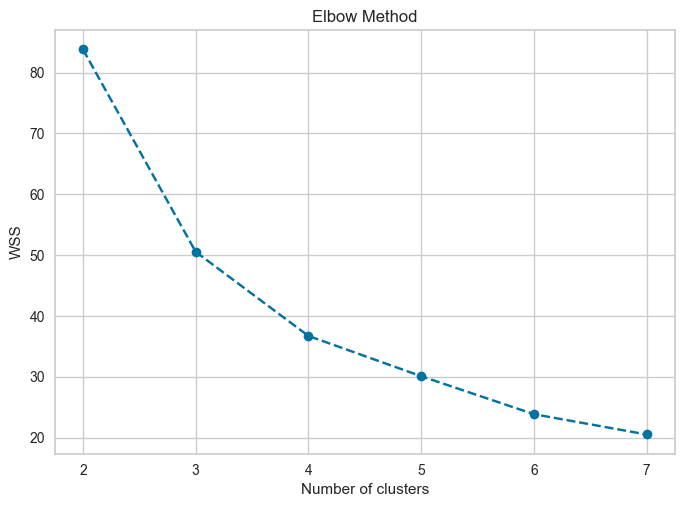

In [95]:
wss = []
for k in clusters:
    # model definition
    Kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model trainin
    Kmeans.fit(X)

    # validation
    wss.append(Kmeans.inertia_)

plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.show()

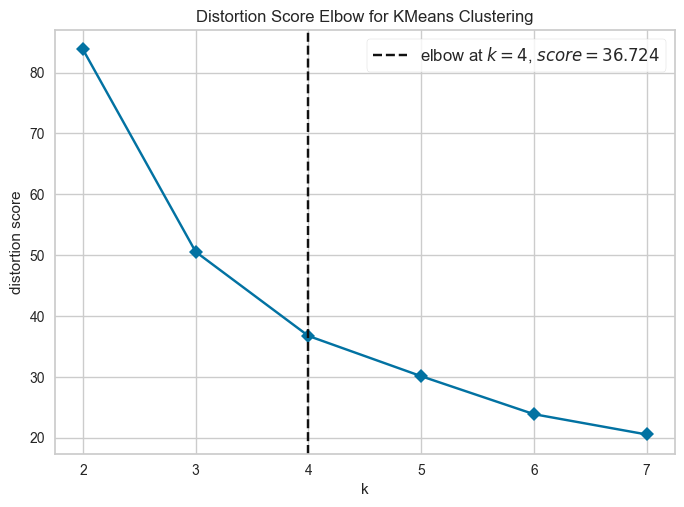

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
kmeans = KElbowVisualizer(Kmeans, k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()


## <span style="color:blue">7.2</span> Silhouette Score

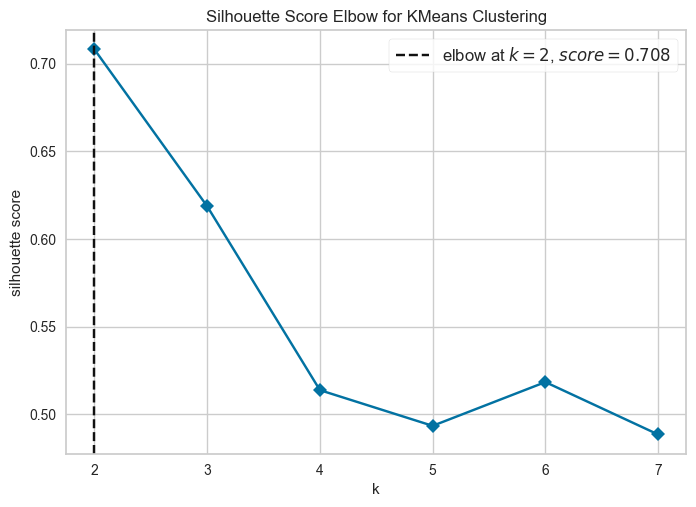

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [97]:
kmeans = KElbowVisualizer(Kmeans, k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

## <span style="color:blue">7.3</span>  Silhouette Analysis

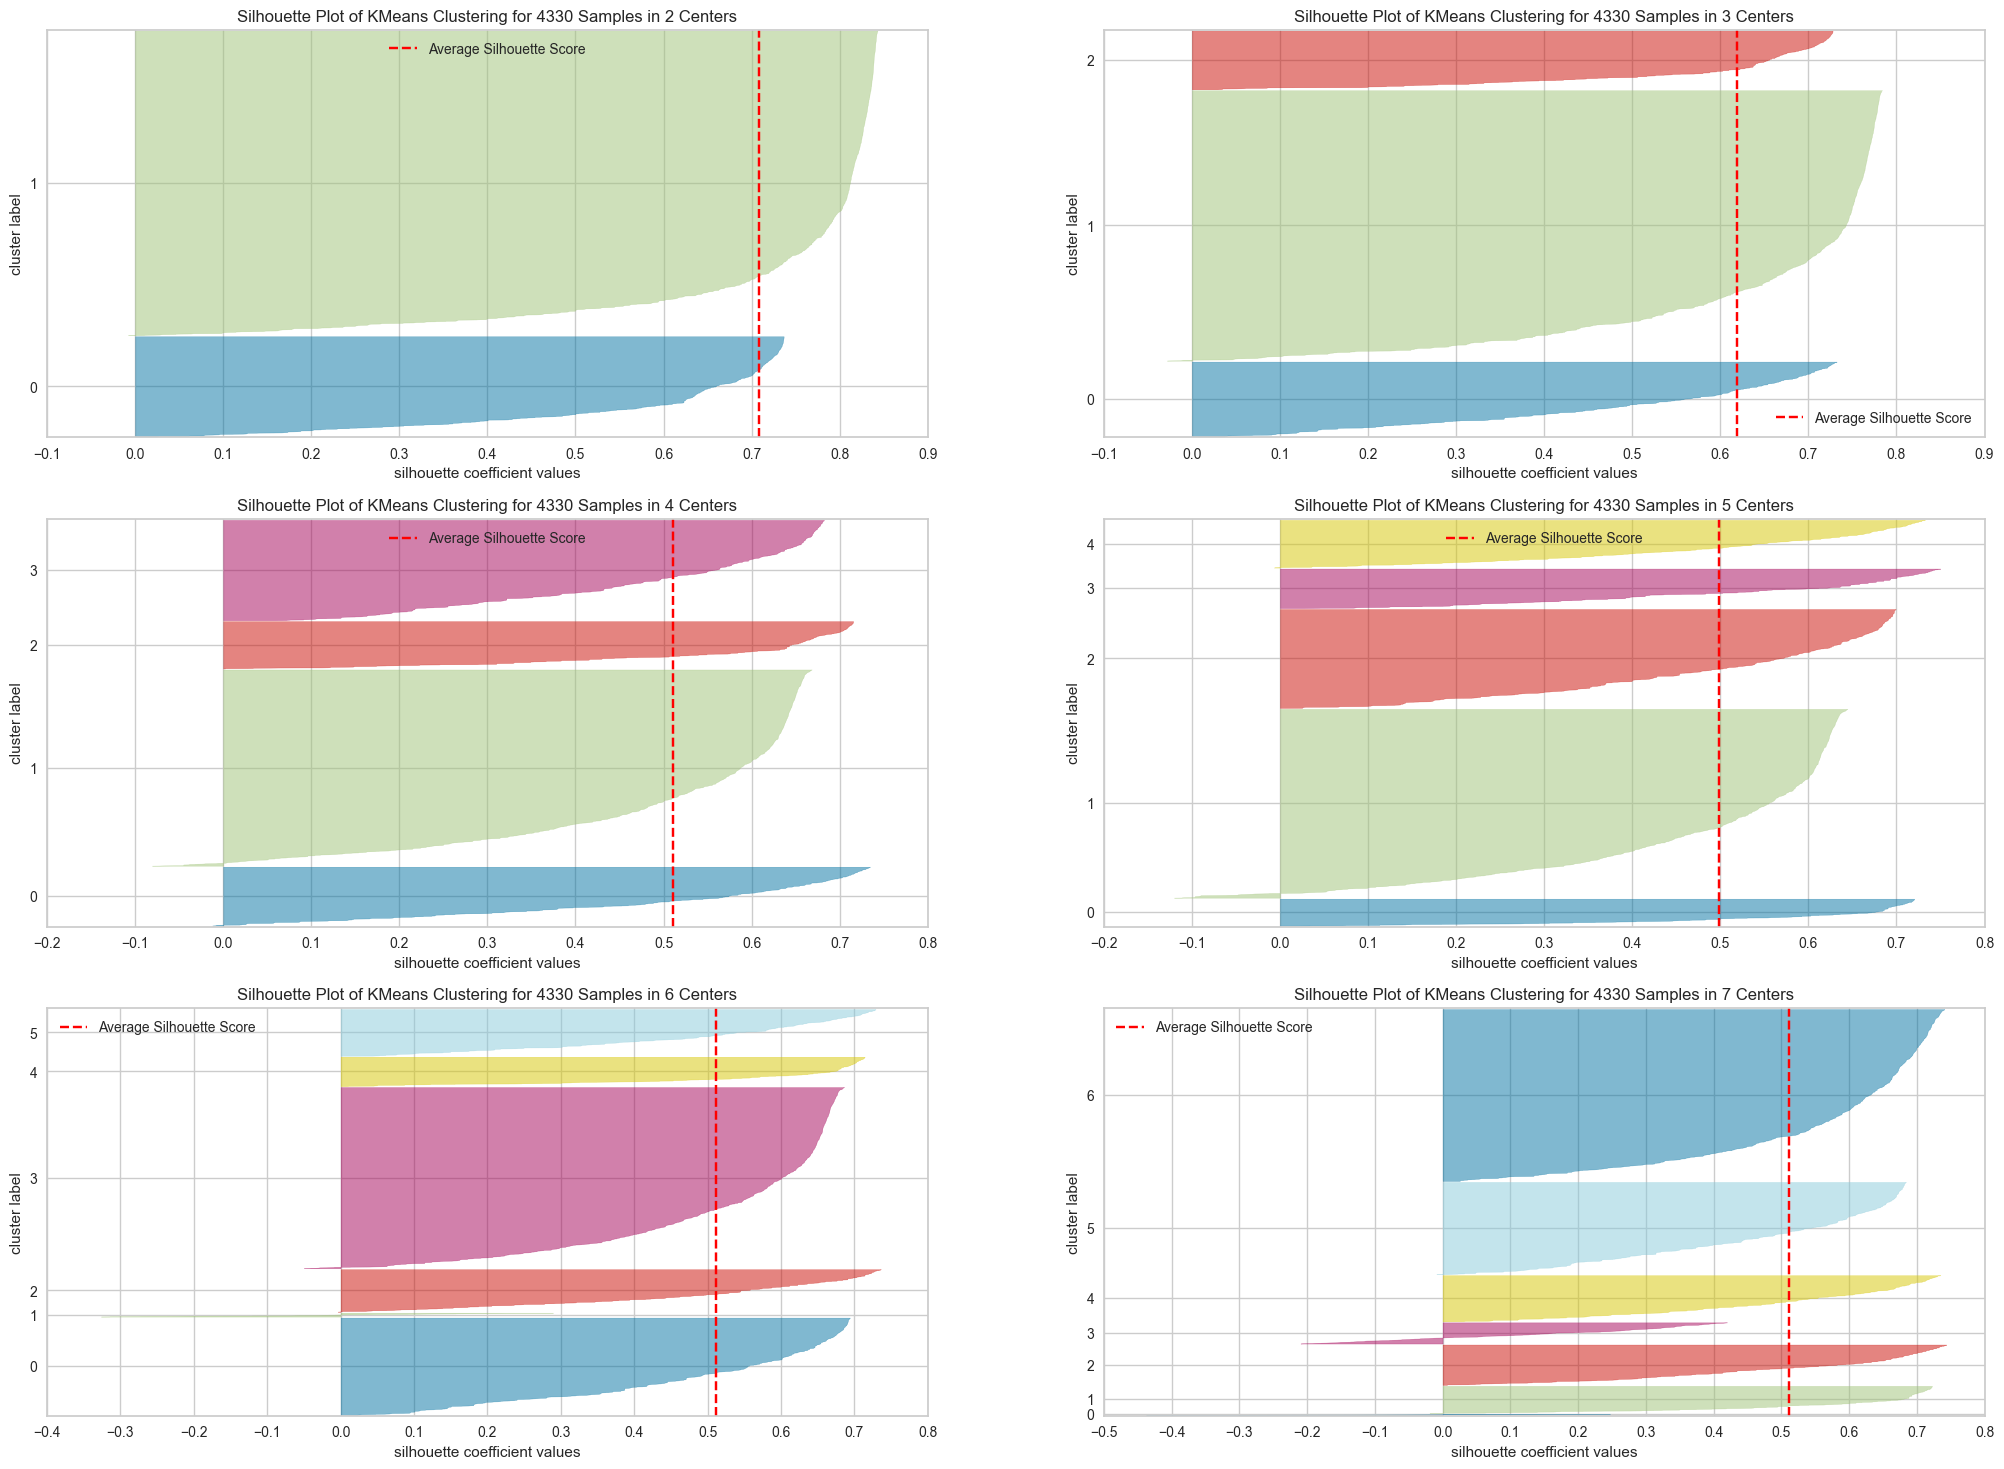

In [98]:
fig, ax = plt.subplots(3, 2, figsize=(25, 18))
for k in clusters:
    
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1, mod])
    visualizer.fit(X)
    visualizer.finalize()

# <font color='blue'> 🚀 8.0 Model Training

## <span style="color:blue">8.1</span>  K-means

In [99]:
# model definition
k=5
model_kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=84)

# model training
model_kmeans.fit(X)

# Clustering
labels = model_kmeans.labels_

# Check unique clusters
print(np.unique(labels))

[0 1 2 3 4]


## <span style="color:blue">8.2</span> Cluster Validation

In [100]:
## WSS (Within-cluster sum of squares)
print('WSS value: ', model_kmeans.inertia_)

## Silhouette Score
print('SS value {}:'.format( silhouette_score(X, labels, metric='euclidean') ))

WSS value:  30.12335050861708
SS value 0.4989258254668902:


# <font color='blue'> 🌐 9.0 Cluster Analysis: Unveiling Hidden Patterns

In [101]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket,returns_count,cluster
0,17850,0.019301,0.997319,0.160976,0.000208,0.022222,1
1,13047,0.011567,0.150134,0.039024,0.000218,0.155556,0
2,12583,0.024009,0.005362,0.068293,0.000347,0.044444,4
3,13748,0.003384,0.254692,0.019512,0.000412,0.000000,0
4,15100,0.003125,0.892761,0.009756,0.003756,0.066667,1


## <span style="color:blue">9.1</span> Visualizaion Inspection

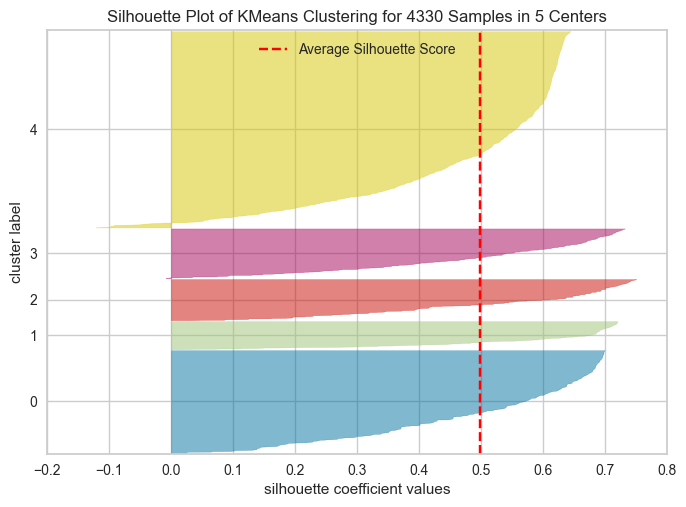

In [102]:
visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## <span style="color:blue">9.2</span> 2d plot

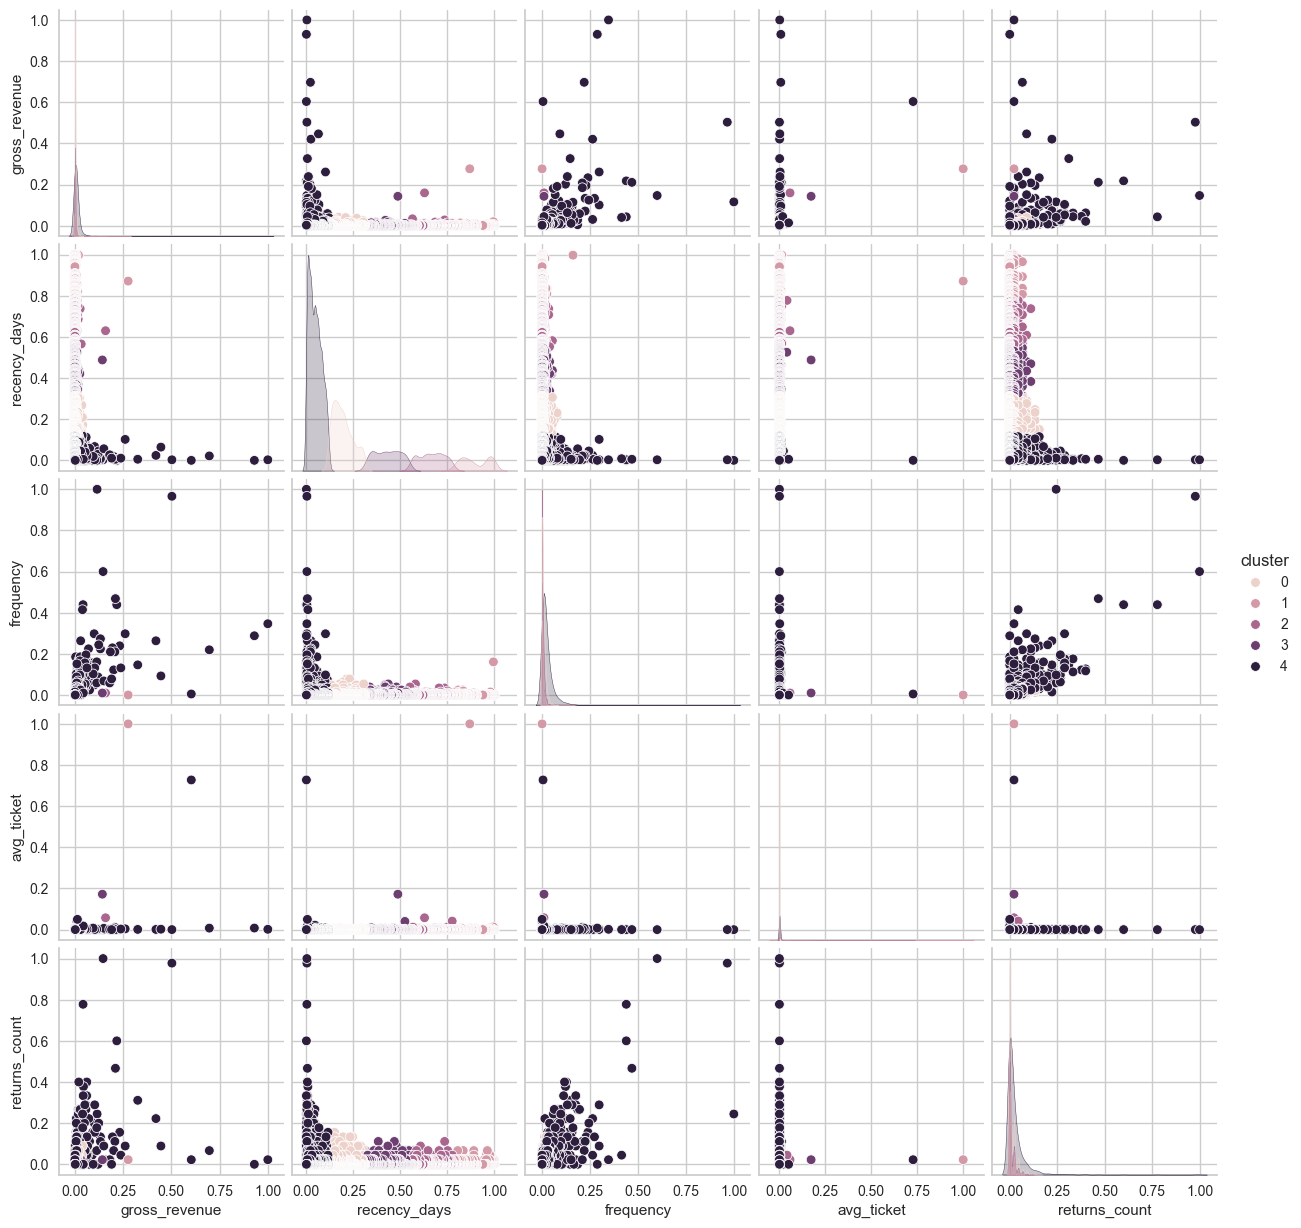

In [103]:
df_viz = df9.drop(columns=['customer_id'])
sns.pairplot(df_viz, hue='cluster')

## <span style="color:blue">9.3</span> UMAP

In [ ]:
reducer = umap.UMAP(n_neighbors=1905, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', 
                palette= sns.color_palette('hls', n_colors=df_viz['cluster'].nunique()), 
                data=df_viz)

## <span style="color:blue">9.4</span> Cluster Profile

In [92]:
df9.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,1
1,13047,3079.10,31,18,15.709694,2
2,12583,7187.34,2,18,28.634821,1
3,13748,948.25,95,5,33.866071,2
4,15100,635.10,330,6,105.850000,2


In [95]:
# Number os customers
df_cluster = df9[['cluster', 'customer_id']].groupby('cluster').count().reset_index().rename(columns={'customer_id': 'count_customer'})
df_cluster['perc_customer'] = df_cluster['count_customer'] / df_cluster['count_customer'].sum() * 100

# Avg Gross Revenue
df_cluster['avg_gross_revenue'] = df9[['cluster', 'gross_revenue']].groupby('cluster').mean().reset_index()['gross_revenue']

# Avg Recency Days
df_cluster['avg_recency_days'] = df9[['cluster', 'recency_days']].groupby('cluster').mean().reset_index()['recency_days']

# Avg Frequency
df_cluster['avg_frequency'] = df9[['cluster', 'frequency']].groupby('cluster').mean().reset_index()['frequency']

# Avg Ticket
df_cluster['mean_avg_ticket '] = df9[['cluster', 'avg_ticket']].groupby('cluster').mean().reset_index()['avg_ticket']

df_cluster

,cluster,count_customer,perc_customer,avg_gross_revenue,avg_recency_days,avg_frequency,mean_avg_ticket
0,0,6,0.137237,182181.981667,7.166667,89.000000,253.626345
1,1,267,6.107045,8089.028652,20.280899,19.528090,62.783157
2,2,4071,93.115279,946.696250,96.969295,3.641120,25.359654
3,3,28,0.640439,42614.387143,6.178571,57.821429,162.862605


### Cluster 00: Extremely High-Value Customers (Revenue & Frequency Focus)

* **Number of Customers:** 6 (0.14% of customers) - A very small, but extremely valuable group.
* **Average Recency:** 7 days - Very recent customers, indicating continuous engagement.
* **Average Number of Purchases (Frequency):** 89 purchases - Extremely frequent customers.
* **Average Total Revenue (per customer):** R$ 182,181.98 - Customers who generate the highest *accumulated* revenue individually.
* **Average Ticket Size (per purchase):** R$ 253.63 - The average amount spent *per single purchase*.

---

### Cluster 01: Medium-to-High Value Customers (Good Engagement & Solid Revenue)

* **Number of Customers:** 267 (6.11% of customers) - A reasonably sized group.
* **Average Recency:** 20 days - Still quite recent, but slightly less so than Cluster 00.
* **Average Number of Purchases (Frequency):** 20 purchases - Good frequency, indicating loyalty.
* **Average Total Revenue (per customer):** R$ 8,089.03 - Customers who contribute significantly to the total revenue.
* **Average Ticket Size (per purchase):** R$ 62.78 - Good average ticket size, boosted by frequency.

---

### Cluster 02: Low-Value Customers (Highest Volume, Lower Engagement)

* **Number of Customers:** 4,071 (93.12% of customers) - The vast majority of the customer base.
* **Average Recency:** 97 days - Older customers or those with less recent activity.
* **Average Number of Purchases (Frequency):** 4 purchases - Low frequency, indicating sporadic purchases.
* **Average Total Revenue (per customer):** R$ 946.70 - Individually contribute low revenue.
* **Average Ticket Size (per purchase):** R$ 25.36 - The lowest average ticket size.

---

### Cluster 03: High-Value Customers (Very High Recency & Frequency)

* **Number of Customers:** 28 (0.64% of customers) - A small but very valuable group.
* **Average Recency:** 6 days - Extremely recent, even surpassing Cluster 00 on average.
* **Average Number of Purchases (Frequency):** 58 purchases - Very high purchase frequency.
* **Average Total Revenue (per customer):** R$ 42,614.39 - Generate a very high individual revenue.
* **Average Ticket Size (per purchase):** R$ 162.86 - Significantly high average ticket size.

---

# <font color='blue'> ✨ 10.0 Deploy to Production